<a href="https://colab.research.google.com/github/gustavo-ifusp/prefeitura_smit_sp360/blob/main/estatistica_descritiva_mes_Passageiros_Transportados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta

In [ ]:
dados = pd.DataFrame()
dados = pd.read_csv('fato_total_passageiros_transportados_sptrans.csv')
dados.tail(10)

,data,dia_da_semana,total_passageiros_transportados,passageiros_pagtes_em_dinheiro,passageiros_comum_e_vt,passageiros_pgts_bu_comum_m,passageiros_pagtes_estudante,passageiros_pgts_bu_est_mensal,passageiros_pgts_bu_vt_mensal,passageiros_pagantes,passageiros_int_onibus_onibus,passageiros_com_gratuidade,passageiros_com_gratuidade_est
909,2021-07-31,Sábado,3023767,239583,1508356,78693,6895,49,9,1833585,822848,350867,16467
910,2021-08-01,Domingo,1392340,117429,657613,35953,3244,22,9,814270,377051,189086,11933
911,2021-08-02,Segunda-feira,4494561,311657,2241423,100502,19298,41,19,2672940,1262525,499463,59633
912,2021-08-03,Terça-feira,4838057,299532,2421517,111446,24922,57,23,2857497,1371212,525091,84257
913,2021-08-04,Quarta-feira,4985943,301444,2486363,115398,27665,45,17,2930932,1399190,561333,94488
914,2021-08-05,Quinta-feira,5086312,307427,2534607,118010,28746,74,28,2988892,1435754,563052,98614
915,2021-08-06,Sexta-feira,5537159,366550,2740300,127022,30802,51,27,3264752,1541411,638870,92126
916,2021-08-07,Sábado,3419556,284744,1664757,87888,13905,67,11,2051372,907874,399412,60898
917,2021-08-08,Domingo,1683558,160330,776474,42842,5766,39,12,985463,448757,222127,27211
918,2021-08-09,Segunda-feira,4916277,337314,2409227,113554,30406,58,15,2890574,1364137,558303,103263


In [ ]:
dados['data'] = pd.to_datetime(dados['data'])
dados['dia_da_semana'] = dados['dia_da_semana'].astype("category")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data                             919 non-null    datetime64[ns]
 1   dia_da_semana                    919 non-null    category      
 2   total_passageiros_transportados  919 non-null    int64         
 3   passageiros_pagtes_em_dinheiro   919 non-null    int64         
 4   passageiros_comum_e_vt           919 non-null    int64         
 5   passageiros_pgts_bu_comum_m      919 non-null    int64         
 6   passageiros_pagtes_estudante     919 non-null    int64         
 7   passageiros_pgts_bu_est_mensal   919 non-null    int64         
 8   passageiros_pgts_bu_vt_mensal    919 non-null    int64         
 9   passageiros_pagantes             919 non-null    int64         
 10  passageiros_int_onibus_onibus    919 non-null    int64        

In [ ]:
dados['mes'] = dados['data'].dt.month
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['mes'].astype(int)
dados['mes_ano'] = dados['mes'].apply(str) + " - " + dados['ano'].apply(str)
dados['mes_ano'] = dados['mes_ano'].astype("category")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data                             919 non-null    datetime64[ns]
 1   dia_da_semana                    919 non-null    category      
 2   total_passageiros_transportados  919 non-null    int64         
 3   passageiros_pagtes_em_dinheiro   919 non-null    int64         
 4   passageiros_comum_e_vt           919 non-null    int64         
 5   passageiros_pgts_bu_comum_m      919 non-null    int64         
 6   passageiros_pagtes_estudante     919 non-null    int64         
 7   passageiros_pgts_bu_est_mensal   919 non-null    int64         
 8   passageiros_pgts_bu_vt_mensal    919 non-null    int64         
 9   passageiros_pagantes             919 non-null    int64         
 10  passageiros_int_onibus_onibus    919 non-null    int64        

In [ ]:
parte_dados = dados[['total_passageiros_transportados', 'passageiros_pagtes_em_dinheiro','passageiros_comum_e_vt','passageiros_pgts_bu_comum_m','passageiros_pagtes_estudante','passageiros_pgts_bu_est_mensal','passageiros_pgts_bu_vt_mensal','passageiros_pagantes','passageiros_int_onibus_onibus','passageiros_com_gratuidade' ,'passageiros_com_gratuidade_est']]

In [ ]:
display(dados)

,data,dia_da_semana,total_passageiros_transportados,passageiros_pagtes_em_dinheiro,passageiros_comum_e_vt,passageiros_pgts_bu_comum_m,passageiros_pagtes_estudante,passageiros_pgts_bu_est_mensal,passageiros_pgts_bu_vt_mensal,passageiros_pagantes,passageiros_int_onibus_onibus,passageiros_com_gratuidade,passageiros_com_gratuidade_est,mes,ano,mes_ano
0,2019-02-01,Sexta-feira,8565761,504393,1773956,187179,37560,124,116,4569310,2592601,1341236,62614,2,2019,2 - 2019
1,2019-02-02,Sábado,5332887,377544,1053024,128838,21017,78,68,2843756,1560098,867083,61950,2,2019,2 - 2019
2,2019-02-03,Domingo,2872336,222311,477045,70681,10738,52,46,1462656,824588,547817,37275,2,2019,2 - 2019
3,2019-02-04,Segunda-feira,7424481,461956,1469170,158432,54315,115,88,3956575,2191541,1120494,155871,2,2019,2 - 2019
4,2019-02-05,Terça-feira,2796390,158655,578766,55897,22701,33,28,1428611,822060,479052,66667,2,2019,2 - 2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2021-08-05,Quinta-feira,5086312,307427,2534607,118010,28746,74,28,2988892,1435754,563052,98614,8,2021,8 - 2021
915,2021-08-06,Sexta-feira,5537159,366550,2740300,127022,30802,51,27,3264752,1541411,638870,92126,8,2021,8 - 2021
916,2021-08-07,Sábado,3419556,284744,1664757,87888,13905,67,11,2051372,907874,399412,60898,8,2021,8 - 2021
917,2021-08-08,Domingo,1683558,160330,776474,42842,5766,39,12,985463,448757,222127,27211,8,2021,8 - 2021


In [ ]:
dados_media = dados.groupby(['dia_da_semana','mes_ano'], as_index=False)['total_passageiros_transportados'].mean()
dados_media = dados_media.rename(columns={'total_passageiros_transportados': 'media_passageiros_transportados'})
dados_media['media_passageiros_transportados'] = dados_media['media_passageiros_transportados'].fillna(0)
dados_mediana = dados.groupby(['dia_da_semana','mes_ano'], as_index=False)['total_passageiros_transportados'].median()
dados_mediana = dados_mediana.rename(columns={'total_passageiros_transportados': 'mediana_passageiros_transportados'})
dados_media['mes_ano'] = pd.to_datetime(dados_media['mes_ano'])
dados_mediana['mes_ano'] = pd.to_datetime(dados_mediana['mes_ano'])
display(dados_media)
display(dados_mediana)

,dia_da_semana,mes_ano,media_passageiros_transportados
0,Domingo,2020-01-01,2635644.00
1,Domingo,2021-01-01,1501576.60
2,Domingo,2019-10-01,3058035.00
3,Domingo,2020-10-01,1517115.00
4,Domingo,2019-11-01,2987169.50
...,...,...,...
212,Terça-feira,2019-08-01,7434845.75
213,Terça-feira,2020-08-01,4606918.00
214,Terça-feira,2021-08-01,4838057.00
215,Terça-feira,2019-09-01,9068747.25


,dia_da_semana,mes_ano,mediana_passageiros_transportados
0,Domingo,2020-01-01,2641586.5
1,Domingo,2021-01-01,1401686.0
2,Domingo,2019-10-01,3057723.5
3,Domingo,2020-10-01,1494395.5
4,Domingo,2019-11-01,2999237.0
...,...,...,...
212,Terça-feira,2019-08-01,8939784.0
213,Terça-feira,2020-08-01,4650595.5
214,Terça-feira,2021-08-01,4838057.0
215,Terça-feira,2019-09-01,9028472.5


#**Visualização dos Passageiros Transportados:**

*   Eixo x: coluna 'mes_ano'  
*   Eixo y: coluna 'total_passageiros_transportados'
*   Hue:  coluna 'dia_da_semana'
*   Base: 'dados_media'



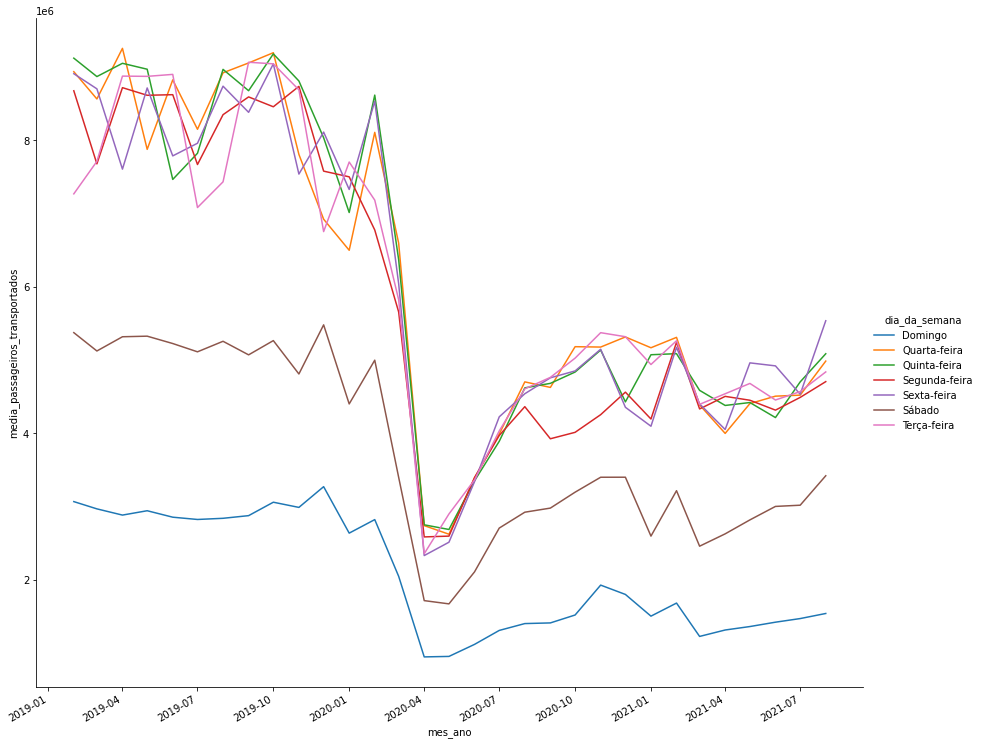

In [ ]:
g = sns.relplot(x="mes_ano", y="media_passageiros_transportados", kind="line", hue="dia_da_semana" , data=dados_media,  height=12)
g.fig.autofmt_xdate()

*   Eixo x: coluna 'mes_ano'  #agrupado por 4 medidas
*   Eixo y: coluna 'total_passageiros_transportados'
*   Hue:  coluna 'dia_da_semana'
*   Base: 'dados_mediana'

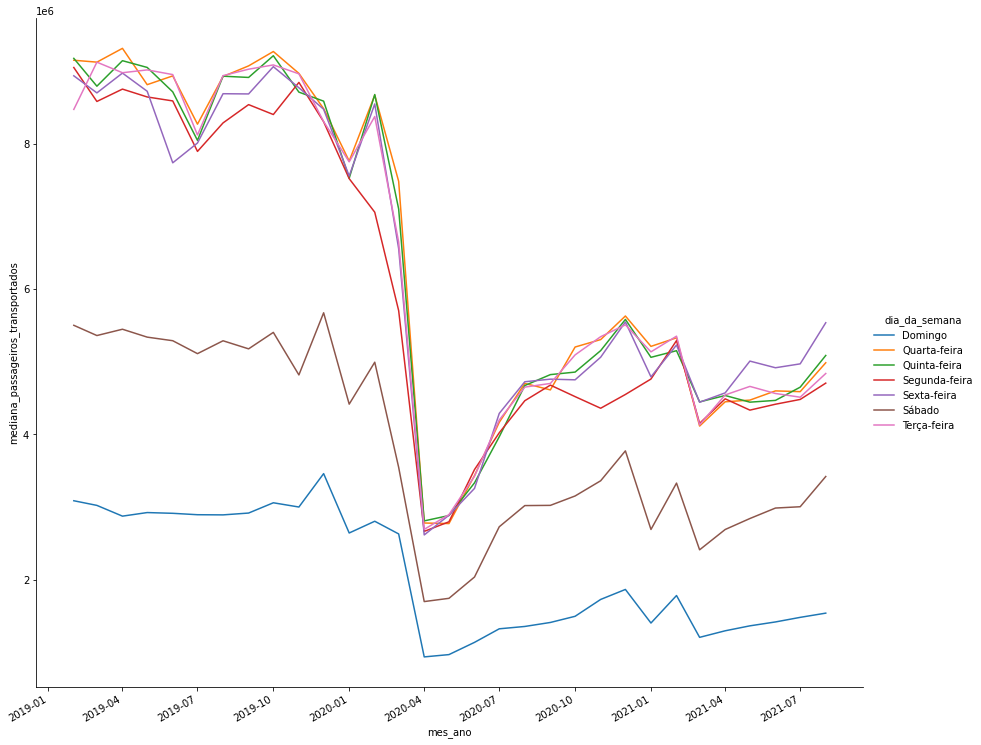

In [ ]:
g = sns.relplot(x="mes_ano", y="mediana_passageiros_transportados", kind="line", hue="dia_da_semana" , data=dados_mediana,  height=12)
g.fig.autofmt_xdate()

In [ ]:
dados_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dia_da_semana                      217 non-null    category      
 1   mes_ano                            217 non-null    datetime64[ns]
 2   mediana_passageiros_transportados  217 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [ ]:
dados_mediana = dados_mediana.drop(['dia_da_semana','mes_ano'], axis = 1)

In [ ]:
all_data = pd.concat([dados_media, dados_mediana],axis = 1)

In [ ]:
all_data_ordenado =  all_data.sort_values(by='mes_ano')
all_data_ordenado.rename(columns={'mes_ano' : 'ano_mes'},inplace = True)

In [ ]:
all_data_ordenado.tail(10)

,dia_da_semana,ano_mes,media_passageiros_transportados,mediana_passageiros_transportados
211,Terça-feira,2021-07-01,4569201.5,4511552.5
149,Sexta-feira,2021-07-01,4532910.4,4970778.0
56,Quarta-feira,2021-07-01,4520719.0,4587878.0
183,Sábado,2021-08-01,3419556.0,3419556.0
28,Domingo,2021-08-01,1537949.0,1537949.0
90,Quinta-feira,2021-08-01,5086312.0,5086312.0
121,Segunda-feira,2021-08-01,4705419.0,4705419.0
59,Quarta-feira,2021-08-01,4985943.0,4985943.0
214,Terça-feira,2021-08-01,4838057.0,4838057.0
152,Sexta-feira,2021-08-01,5537159.0,5537159.0


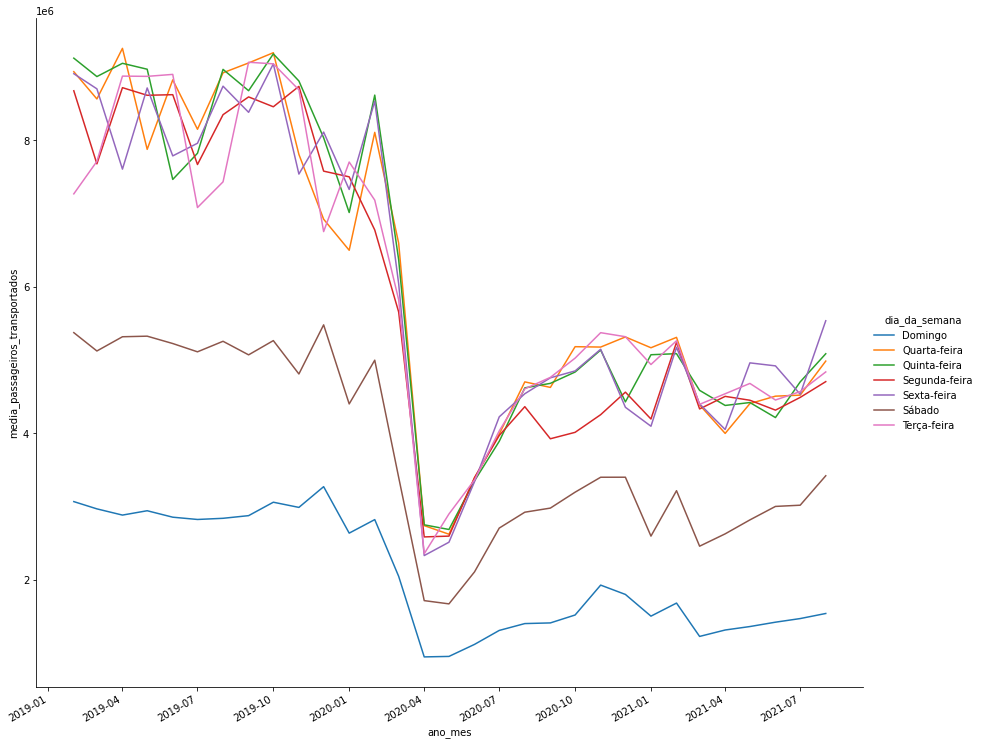

In [ ]:
g = sns.relplot(x="ano_mes", y="media_passageiros_transportados", kind="line", hue="dia_da_semana" , data=all_data_ordenado,  height=12)
g.fig.autofmt_xdate()

In [ ]:
all_data_ordenado.to_csv(r'fato_total_passageiros_transportados_sptrans_export_complet.csv', index = False)